## Install required packages

In [1]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install dateparser

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install jovian

Note: you may need to restart the kernel to use updated packages.


## Import all required packages for the project

In [4]:
import re

In [5]:
import matplotlib.pyplot as plot

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
import seaborn as sns

In [9]:
import calendar

In [10]:
import datetime as dt

In [11]:
from wordcloud import WordCloud,STOPWORDS

In [12]:
import emoji

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
import random

In [15]:
from textblob import TextBlob

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
from sklearn.decomposition import NMF

In [19]:
sns.set(rc={'figure.figsize':(14,6)})

# Data Cleaning

In [20]:
def startswithDate(s):
    pattern='^([0-2][0-9]|(3)[0-1])(\/)(((0)[0-9])|((1)[0-2]))(\/)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'
    result=re.match(pattern,s)
    if result:
        return True
    return False

In [21]:
def startswithAuthor(s):
    patterns=['([\w]+):', # First Name
              '([\w]+[\s]+[\w]+):', # First Name + Last Name
             '([\w]+[\s]+[\w]+[\s]+[\w]+):',  # First Name+ Middle Name + Last Name
             '^(\+\d{1,2}\s)?\(?\d{3}\) ((\(\d{3}\) ?)|(\d{3}-))?\d{3}-\d{4}:',  #Mobile Number(US)
             '([+]\d{2} \d{4} \d{6}):',  # Mobile Number (Europe)
           '([+]\d{3} \d{3} \d{6})'  # Mobile Number (Uganda)
             ]
    pattern='^'+'|'.join(patterns)
    result=re.match(pattern,s)
    if result:
        return True
    return False

In [22]:
def getDataPoint(line):
    splitLine=line.split(' - ') #splitLine=['18/06/2021, 22:47','Loki: Why do you have two numbers, Arsalan?']
    dateTime=splitLine[0] # '18/06/2021, 22:47'
    message=' '.join(splitLine[1:]) #'Loki: Why do you have two numbers, Arsalan?'
    if startswithAuthor(message): #True
        splitmessage=message.split(': ') #splitmessage=['Loki','Why do you have two numbers, Arsalan?']
        author=splitmessage[0] #author='Loki'
        message=" ".join(splitmessage[1:]) # message='Why do you have two numbers, Arsalan?''
    else:
        author=None
    return dateTime,author,message

In [23]:
parsedChat=[]
convoPath='./WhatsappChat.txt'
with open(convoPath,encoding='utf-8') as fp:
    fp.readline
    messagebuffer=[]
    dateTime,author=None,None
    
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if startswithDate(line):
            if len(messagebuffer)>0:
                parsedChat.append([dateTime,author," ".join(messagebuffer)])
                messagebuffer.clear()
                dateTime,author,message=getDataPoint(line)
                messagebuffer.append(message)
            else:
                messagebuffer.append(line)
        


In [24]:
parsedChat

[[None, None, '26/12/2017, 12:28 - Pauline: Lena and Pauline available✔'],
 ['26/12/2017, 15:58',
  'Joanna',
  'Testing 3-5 outdoor venues by night today and will advise after camera man has shared.'],
 ['26/12/2017, 22:45', 'Joanna', '<Media omitted>'],
 ['28/12/2017, 21:14', 'Micheal', 'It will happen to you'],
 ['28/12/2017, 21:39', '+256 792 754083', 'See yourself'],
 ['28/12/2017, 23:12',
  'Beth',
  "23/12/2017, 23:42:10 \u202a+256\xa0701\xa0839948\u202c BEWARE. IT'S SNAKE SEASON!!!"],
 ['29/12/2017, 15:27', None, 'Tina, Kerbi: <Media omitted>'],
 ['29/12/2017, 15:36', 'Micheal', "Tina ng'okaye"],
 ['29/12/2017, 21:43',
  'Aunt Dora',
  'For this coming new year I am not wishing anybody anything:'],
 ['29/12/2017, 22:17', 'Aunt Dora', '<Media omitted>'],
 ['30/12/2017, 18:09', 'Beth', '<Media omitted>'],
 ['30/12/2017, 21:33',
  'Aunt Dora',
  'Am taking your orders. 2018 is anticipated to get tough expenditure wise'],
 ['30/12/2017, 21:33', 'Aunt Dora', '<Media omitted>'],
 ['3

In [25]:
df=pd.DataFrame(parsedChat,columns=['DateTime','Author','Message'])

In [26]:
df.head()

,DateTime,Author,Message
0,None,None,"26/12/2017, 12:28 - Pauline: Lena and Pauline ..."
1,"26/12/2017, 15:58",Joanna,Testing 3-5 outdoor venues by night today and ...
2,"26/12/2017, 22:45",Joanna,<Media omitted>
3,"28/12/2017, 21:14",Micheal,It will happen to you
4,"28/12/2017, 21:39",+256 792 754083,See yourself


In [27]:
df.tail()

,DateTime,Author,Message
7329,"25/12/2019, 12:40",Fina,Beautiful.
7330,"25/12/2019, 13:20",Joanna,Thank you😊🌹❤
7331,"25/12/2019, 13:20",Joanna,🤨🤔
7332,"25/12/2019, 18:47",Olivia Namulindwa,Merry Christmas Family🎄🎁 💝
7333,"26/12/2019, 16:58",Ben,<Media omitted>


In [28]:
df.describe()

,DateTime,Author,Message
count,7333,6882,7334
unique,5662,35,4929
top,"15/12/2019, 08:10",Joanna,<Media omitted>
freq,26,1300,1604


In [29]:
# No. of images, images are represented by <Media omitted>
media=df[df['Message']=='<Media omitted>']

In [30]:
author_media_messages_value_counts=media['Author'].value_counts()
top10_author_media_messages_value_counts=author_media_messages_value_counts.head(10)

Text(0.5, 1.0, 'Most Media Items sent per Author')

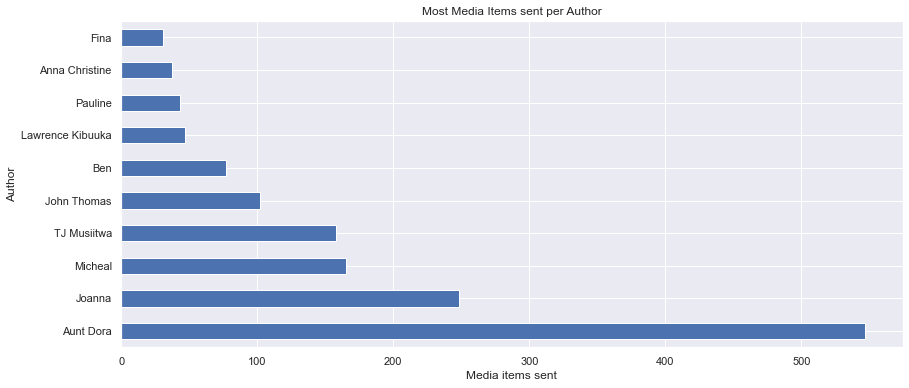

In [31]:
top10_author_media_messages_value_counts.plot.barh()
plot.ylabel('Author')
plot.xlabel('Media items sent')
plot.title('Most Media Items sent per Author')

In [32]:
message_deleted=df[df['Message']=='This message was deleted']

In [33]:
message_deleted

,DateTime,Author,Message
75,"04/01/2018, 20:55",Lena,This message was deleted
600,"24/01/2018, 08:46",Joanna,This message was deleted
601,"24/01/2018, 08:46",Joanna,This message was deleted
679,"01/02/2018, 12:03",Ben,This message was deleted
897,"09/02/2018, 15:30",John Thomas,This message was deleted
...,...,...,...
7104,"18/12/2019, 15:54",John Thomas,This message was deleted
7149,"20/12/2019, 12:12",Joanna,This message was deleted
7150,"20/12/2019, 12:13",Joanna,This message was deleted
7153,"21/12/2019, 08:23",Joanna,This message was deleted


In [34]:
author_messages_deleted_value_counts=message_deleted['Author'].value_counts()

In [35]:
author_messages_deleted_value_counts

Joanna             45
Lena                7
Anna Christine      7
John Thomas         6
+256 792 754083     5
Beth                5
Ben                 3
Irene Nakalembe     2
Bengie              2
Pauline             1
Adela Mulo          1
Junior              1
Patsy               1
Elsie Mulo          1
Kate                1
Kirijja Godfrey     1
Micheal             1
+44 7525 475883     1
Livia Livie         1
+256 776 584356     1
Name: Author, dtype: int64

In [36]:
top10_aithor_messages_deleted_value_counts=author_messages_deleted_value_counts.head(10)

Text(0.5, 0, 'Message Deleted')

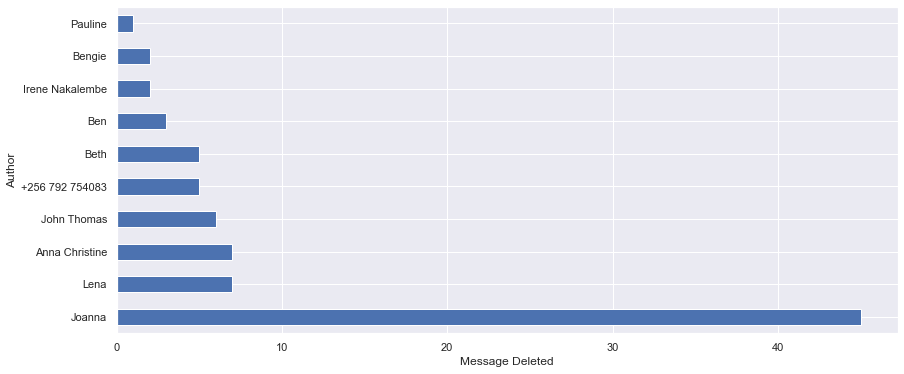

In [37]:
import matplotlib.pyplot as plt
top10_aithor_messages_deleted_value_counts.plot.barh()
plt.ylabel('Author')
plt.xlabel('Message Deleted')

In [38]:
#Number of Group Notifications
grp_notif=df[df['Author']=='grp_notif']

In [39]:
grp_notif.shape

(0, 3)

In [40]:
# Drop the 'media omitted' messages,group notifications and deleted messages
df.drop(media.index,inplace=True)
df.drop(grp_notif.index,inplace=True)
df.drop(message_deleted.index,inplace=True)


In [41]:
# Find the null values
df.isnull().sum()

DateTime      1
Author      452
Message       0
dtype: int64

In [42]:
# Drop empty rows
df=df.dropna()

In [43]:
df.shape

(5185, 3)

In [44]:
df.reset_index(inplace=True,drop=True)

Add the dateTime object from dateTime column

In [45]:
df['dateTime']=pd.to_datetime(df['DateTime'],infer_datetime_format=True)

In [46]:
df['Day of Week']=pd.Series(pd.Categorical(df['dateTime'].dt.day_name(),categories=list(calendar.day_name)))

In [47]:
df['Day of Week']

0         Tuesday
1        Thursday
2        Thursday
3        Thursday
4          Friday
          ...    
5180    Wednesday
5181    Wednesday
5182    Wednesday
5183    Wednesday
5184    Wednesday
Name: Day of Week, Length: 5185, dtype: category
Categories (7, object): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [48]:
df['Hour']=pd.Series(pd.Categorical(df['dateTime'].dt.hour))

In [49]:
df['Hour']

0       15
1       21
2       21
3       23
4       15
        ..
5180    10
5181    12
5182    13
5183    13
5184    18
Name: Hour, Length: 5185, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [50]:
df=df.set_index('dateTime')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5185 entries, 2017-12-26 15:58:00 to 2019-12-25 18:47:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   DateTime     5185 non-null   object  
 1   Author       5185 non-null   object  
 2   Message      5185 non-null   object  
 3   Day of Week  5185 non-null   category
 4   Hour         5185 non-null   category
dtypes: category(2), object(3)
memory usage: 173.2+ KB


In [52]:
df.head()


,DateTime,Author,Message,Day of Week,Hour
dateTime,,,,,
2017-12-26 15:58:00,"26/12/2017, 15:58",Joanna,Testing 3-5 outdoor venues by night today and ...,Tuesday,15
2017-12-28 21:14:00,"28/12/2017, 21:14",Micheal,It will happen to you,Thursday,21
2017-12-28 21:39:00,"28/12/2017, 21:39",+256 792 754083,See yourself,Thursday,21
2017-12-28 23:12:00,"28/12/2017, 23:12",Beth,"23/12/2017, 23:42:10 ‪+256 701 839948‬ BEWARE....",Thursday,23
2017-12-29 15:36:00,"29/12/2017, 15:36",Micheal,Tina ng'okaye,Friday,15


## Data Exploration

In [53]:
df.describe()

,DateTime,Author,Message,Day of Week,Hour
count,5185,5185,5185,5185,5185
unique,4309,35,4595,7,24
top,"02/11/2018, 07:49",Joanna,Amen,Sunday,9
freq,8,1007,35,983,460


In [54]:
author_value_counts=df['Author'].value_counts()
top10_talkers=author_value_counts.head(10)

In [55]:
top10_talkers

Joanna             1007
Anna Christine      449
Fina                368
Lena                341
Aunt Dora           285
Kate                256
Ben                 241
Irene Nakalembe     227
Elsie Mulo          225
Patsy               194
Name: Author, dtype: int64

Text(0.5, 1.0, 'The top 10 Most Talkatie Persons')

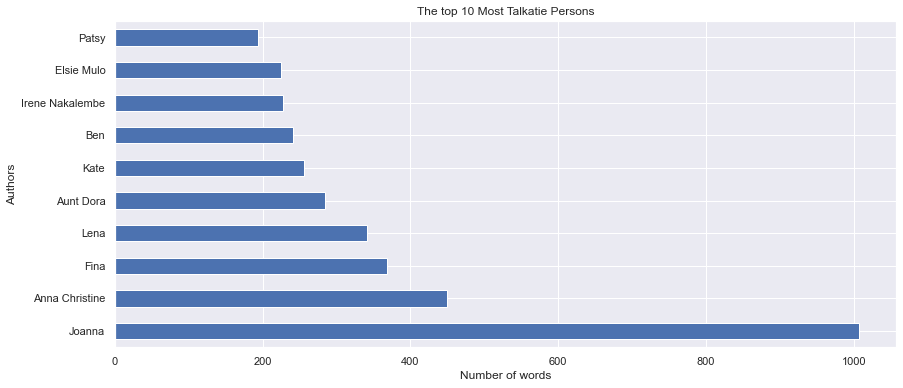

In [56]:
top10_talkers.plot.barh()
plt.xlabel('Number of words')
plt.ylabel('Authors')
plt.title('The top 10 Most Talkatie Persons')

In [57]:
df

,DateTime,Author,Message,Day of Week,Hour
dateTime,,,,,
2017-12-26 15:58:00,"26/12/2017, 15:58",Joanna,Testing 3-5 outdoor venues by night today and ...,Tuesday,15
2017-12-28 21:14:00,"28/12/2017, 21:14",Micheal,It will happen to you,Thursday,21
2017-12-28 21:39:00,"28/12/2017, 21:39",+256 792 754083,See yourself,Thursday,21
2017-12-28 23:12:00,"28/12/2017, 23:12",Beth,"23/12/2017, 23:42:10 ‪+256 701 839948‬ BEWARE....",Thursday,23
2017-12-29 15:36:00,"29/12/2017, 15:36",Micheal,Tina ng'okaye,Friday,15
...,...,...,...,...,...
2019-12-25 10:48:00,"25/12/2019, 10:48",Anna Christine,Wow....you should have printed this card earli...,Wednesday,10
2019-12-25 12:40:00,"25/12/2019, 12:40",Fina,Beautiful.,Wednesday,12
2019-12-25 13:20:00,"25/12/2019, 13:20",Joanna,Thank you😊🌹❤,Wednesday,13


In [58]:
df['Date']=df['DateTime'].apply(lambda t:t.split(',')[0])

In [59]:
df['Date']

dateTime
2017-12-26 15:58:00    26/12/2017
2017-12-28 21:14:00    28/12/2017
2017-12-28 21:39:00    28/12/2017
2017-12-28 23:12:00    28/12/2017
2017-12-29 15:36:00    29/12/2017
                          ...    
2019-12-25 10:48:00    25/12/2019
2019-12-25 12:40:00    25/12/2019
2019-12-25 13:20:00    25/12/2019
2019-12-25 13:20:00    25/12/2019
2019-12-25 18:47:00    25/12/2019
Name: Date, Length: 5185, dtype: object

Text(0, 0.5, 'Number of messages')

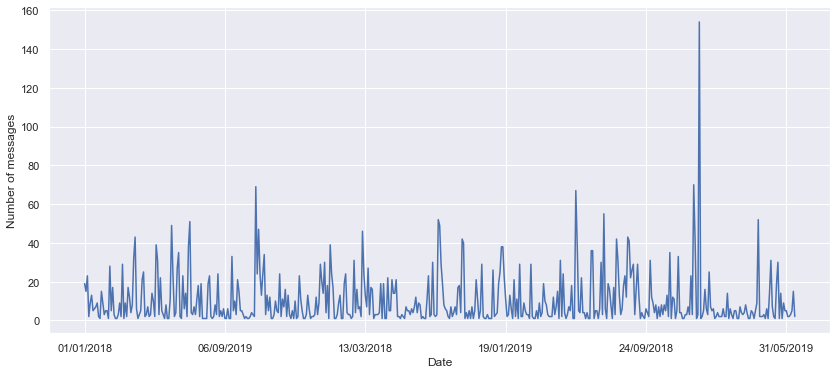

In [60]:
df.groupby('Date')['Message'].count().plot()
plt.ylabel('Number of messages')

In [61]:
df['Time']=df['DateTime'].apply(lambda t: t.split(',')[1])

In [62]:
df['Time']

dateTime
2017-12-26 15:58:00     15:58
2017-12-28 21:14:00     21:14
2017-12-28 21:39:00     21:39
2017-12-28 23:12:00     23:12
2017-12-29 15:36:00     15:36
                        ...  
2019-12-25 10:48:00     10:48
2019-12-25 12:40:00     12:40
2019-12-25 13:20:00     13:20
2019-12-25 13:20:00     13:20
2019-12-25 18:47:00     18:47
Name: Time, Length: 5185, dtype: object

Text(0, 0.5, 'Number of messages')

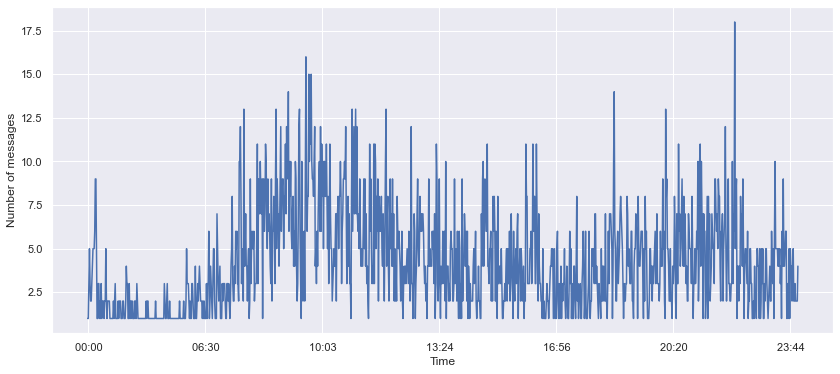

In [63]:
df.groupby('Time')['Message'].count().plot()
plt.ylabel('Number of messages')

Text(0, 0.5, 'Number of messages')

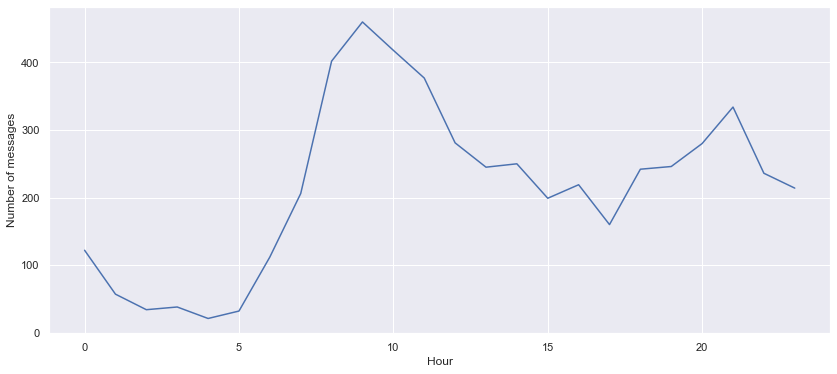

In [64]:
df.groupby('Hour')['Message'].count().plot()
plt.ylabel('Number of messages')

In [65]:
df['Letter Count']=df['Message'].apply(lambda s: len(s))

In [67]:
df['Letter Count']

dateTime
2017-12-26 15:58:00    86
2017-12-28 21:14:00    21
2017-12-28 21:39:00    12
2017-12-28 23:12:00    67
2017-12-29 15:36:00    13
                       ..
2019-12-25 10:48:00    79
2019-12-25 12:40:00    10
2019-12-25 13:20:00    12
2019-12-25 13:20:00     2
2019-12-25 18:47:00    26
Name: Letter Count, Length: 5185, dtype: int64

In [68]:
len('asdas')

5

In [69]:
df['Word Count']=df['Message'].apply(lambda s: len(s.split(' ')))

In [70]:
df['Word Count']

dateTime
2017-12-26 15:58:00    15
2017-12-28 21:14:00     5
2017-12-28 21:39:00     2
2017-12-28 23:12:00     7
2017-12-29 15:36:00     2
                       ..
2019-12-25 10:48:00    13
2019-12-25 12:40:00     1
2019-12-25 13:20:00     2
2019-12-25 13:20:00     1
2019-12-25 18:47:00     4
Name: Word Count, Length: 5185, dtype: int64

In [71]:
df['Message']

dateTime
2017-12-26 15:58:00    Testing 3-5 outdoor venues by night today and ...
2017-12-28 21:14:00                                It will happen to you
2017-12-28 21:39:00                                         See yourself
2017-12-28 23:12:00    23/12/2017, 23:42:10 ‪+256 701 839948‬ BEWARE....
2017-12-29 15:36:00                                        Tina ng'okaye
                                             ...                        
2019-12-25 10:48:00    Wow....you should have printed this card earli...
2019-12-25 12:40:00                                           Beautiful.
2019-12-25 13:20:00                                         Thank you😊🌹❤
2019-12-25 13:20:00                                                   🤨🤔
2019-12-25 18:47:00                           Merry Christmas Family🎄🎁 💝
Name: Message, Length: 5185, dtype: object

In [72]:
df

,DateTime,Author,Message,Day of Week,Hour,Date,Time,Letter Count,Word Count
dateTime,,,,,,,,,
2017-12-26 15:58:00,"26/12/2017, 15:58",Joanna,Testing 3-5 outdoor venues by night today and ...,Tuesday,15,26/12/2017,15:58,86,15
2017-12-28 21:14:00,"28/12/2017, 21:14",Micheal,It will happen to you,Thursday,21,28/12/2017,21:14,21,5
2017-12-28 21:39:00,"28/12/2017, 21:39",+256 792 754083,See yourself,Thursday,21,28/12/2017,21:39,12,2
2017-12-28 23:12:00,"28/12/2017, 23:12",Beth,"23/12/2017, 23:42:10 ‪+256 701 839948‬ BEWARE....",Thursday,23,28/12/2017,23:12,67,7
2017-12-29 15:36:00,"29/12/2017, 15:36",Micheal,Tina ng'okaye,Friday,15,29/12/2017,15:36,13,2
...,...,...,...,...,...,...,...,...,...
2019-12-25 10:48:00,"25/12/2019, 10:48",Anna Christine,Wow....you should have printed this card earli...,Wednesday,10,25/12/2019,10:48,79,13
2019-12-25 12:40:00,"25/12/2019, 12:40",Fina,Beautiful.,Wednesday,12,25/12/2019,12:40,10,1
2019-12-25 13:20:00,"25/12/2019, 13:20",Joanna,Thank you😊🌹❤,Wednesday,13,25/12/2019,13:20,12,2


In [73]:
print('Total Letter Count in the group:'+str(df['Letter Count'].sum()))

Total Letter Count in the group:210965


In [74]:
print('Total Word Count in the group:'+str(df['Word Count'].sum()))

Total Word Count in the group:38057


What is the most common number of words in a message?

Text(0, 0.5, 'Frequency')

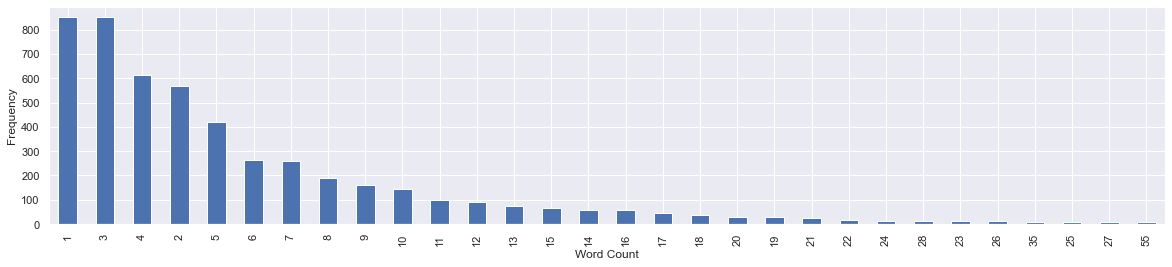

In [77]:
plt.figure(figsize=(20,4))
word_count_value_counts=df['Word Count'].value_counts()
top30_word_count=word_count_value_counts.head(30)
top30_word_count.plot.bar()
plt.xlabel('Word Count')
plt.ylabel('Frequency')

In [78]:
## Summary by user
users=df.groupby('Author')['Author'].count()

In [79]:
print(users)

Author
+1 (647) 704-2525         74
+256 776 584356           13
+256 776 584356 left       1
+256 779 228234           15
+256 792 754083           50
+256 795 230837           12
+256 795 230837 left       1
+44 7525 475883           89
Adela Mulo                62
Anna Christine           449
Anthony Busulwa           20
Aunt Dora                285
Ben                      241
Bengie                   110
Beth                      64
Elsie Mulo               225
Eric Mulo                 10
Fina                     368
Irene Nakalembe          227
Jane                      61
Joanna                  1007
John Thomas              154
Julie Anna                38
Junior                    41
Kate                     256
Kirijja Godfrey           36
Lawrence Kibuuka          98
Lena                     341
Livia Livie               50
Micheal                  172
Olivia Namulindwa         80
Patsy                    194
Pauline                  185
TJ Musiitwa              145
Tony Mu

In [80]:
## Summary by user
msg=df.groupby('Author')['Message'].count()

In [81]:
print(msg)

Author
+1 (647) 704-2525         74
+256 776 584356           13
+256 776 584356 left       1
+256 779 228234           15
+256 792 754083           50
+256 795 230837           12
+256 795 230837 left       1
+44 7525 475883           89
Adela Mulo                62
Anna Christine           449
Anthony Busulwa           20
Aunt Dora                285
Ben                      241
Bengie                   110
Beth                      64
Elsie Mulo               225
Eric Mulo                 10
Fina                     368
Irene Nakalembe          227
Jane                      61
Joanna                  1007
John Thomas              154
Julie Anna                38
Junior                    41
Kate                     256
Kirijja Godfrey           36
Lawrence Kibuuka          98
Lena                     341
Livia Livie               50
Micheal                  172
Olivia Namulindwa         80
Patsy                    194
Pauline                  185
TJ Musiitwa              145
Tony Mu

So who exactly writes the most letters?

In [83]:
total_letter_count_by_author=df[['Author','Letter Count']].groupby('Author').sum()

In [84]:
sorted_total_letter_count_by_author=total_letter_count_by_author.sort_values('Letter Count',ascending=False)
top10_sorted_total_letter_grouped_by_author=sorted_total_letter_count_by_author.head(10)


Text(0, 0.5, 'Authors')

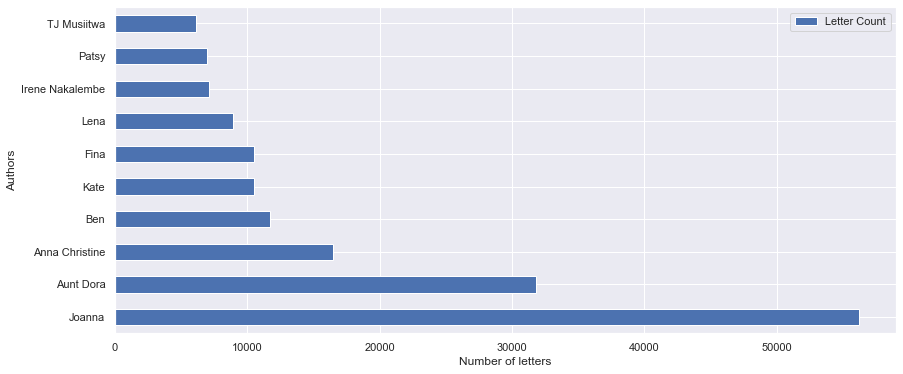

In [85]:
top10_sorted_total_letter_grouped_by_author.plot.barh()
plt.xlabel('Number of letters')
plt.ylabel('Authors')

Text(0, 0.5, 'Authors')

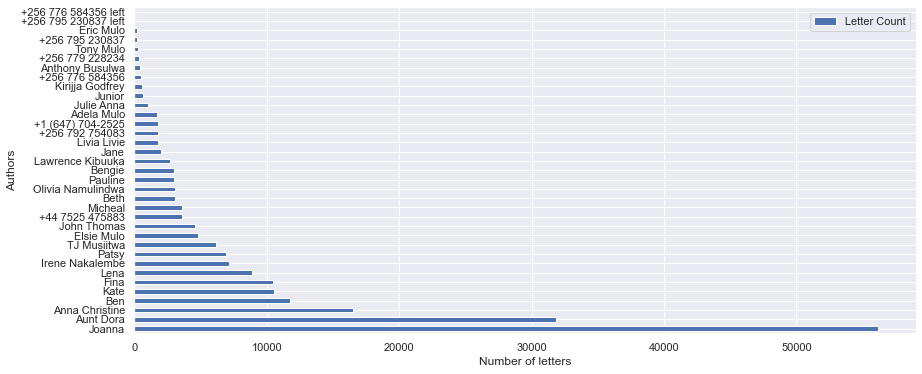

In [86]:
total_letter_count_by_author=df[['Author','Letter Count']].groupby('Author').sum()
sorted_total_letter_count_by_author=total_letter_count_by_author.sort_values('Letter Count',ascending=False)
sorted_total_letter_grouped_by_author=sorted_total_letter_count_by_author
sorted_total_letter_grouped_by_author.plot.barh()
plt.xlabel('Number of letters')
plt.ylabel('Authors')

Most Common number of letter per message

Text(0, 0.5, 'Frequency')

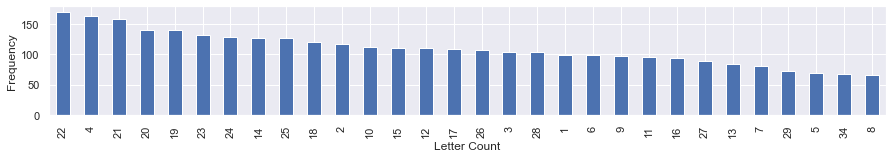

In [91]:
plt.figure(figsize=(15,2))
letter_count_value_counts=df['Letter Count'].value_counts()
top30_letter_count_value_counts=letter_count_value_counts.head(30)
top30_letter_count_value_counts.plot.bar()
plt.xlabel('Letter Count')
plt.ylabel('Frequency')

When was the group most active?

Text(0, 0.5, 'Day of the Week')

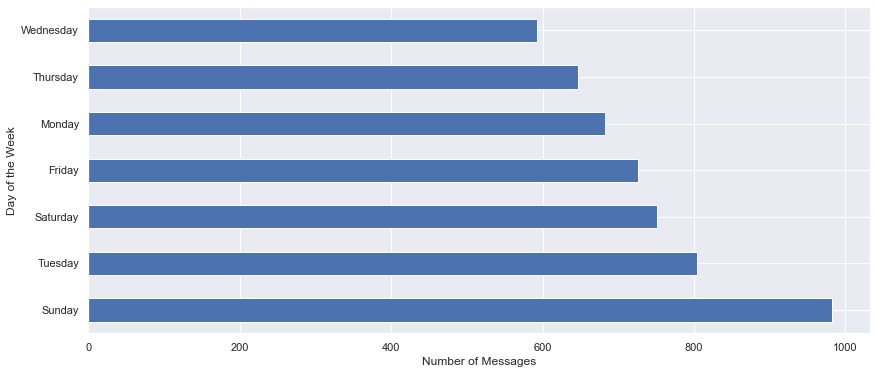

In [92]:
df['Day of Week'].value_counts().plot.barh()
plt.xlabel('Number of Messages')
plt.ylabel('Day of the Week')

Any Particular dates?

Text(0, 0.5, 'Date')

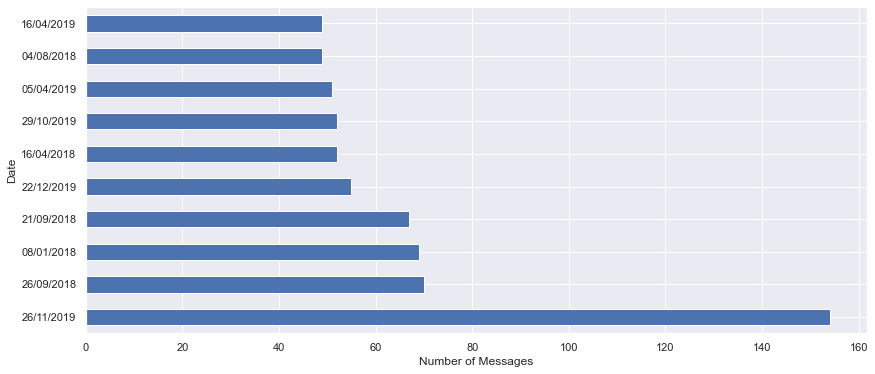

In [93]:
df['Date'].value_counts().head(10).plot.barh()
plt.xlabel('Number of Messages')
plt.ylabel('Date')

The most active Hour

The most suitable time of day to get your message replied to

Text(0, 0.5, 'Hour')

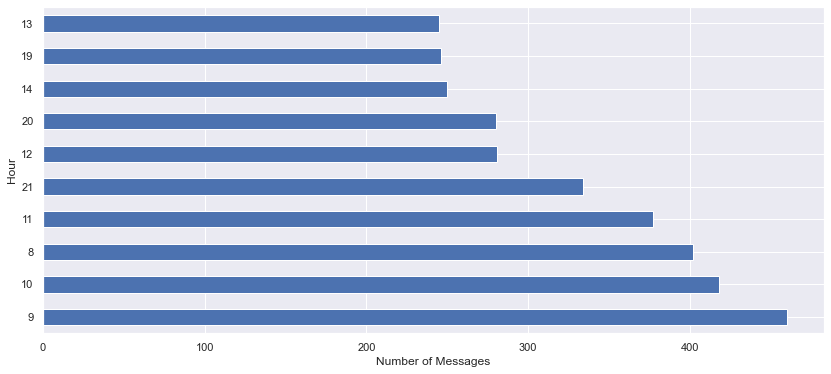

In [94]:
df['Hour'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages sent
plt.xlabel('Number of Messages')
plt.ylabel('Hour')

In [95]:
df['Hour']

dateTime
2017-12-26 15:58:00    15
2017-12-28 21:14:00    21
2017-12-28 21:39:00    21
2017-12-28 23:12:00    23
2017-12-29 15:36:00    15
                       ..
2019-12-25 10:48:00    10
2019-12-25 12:40:00    12
2019-12-25 13:20:00    13
2019-12-25 13:20:00    13
2019-12-25 18:47:00    18
Name: Hour, Length: 5185, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

Text(0, 0.5, 'Time')

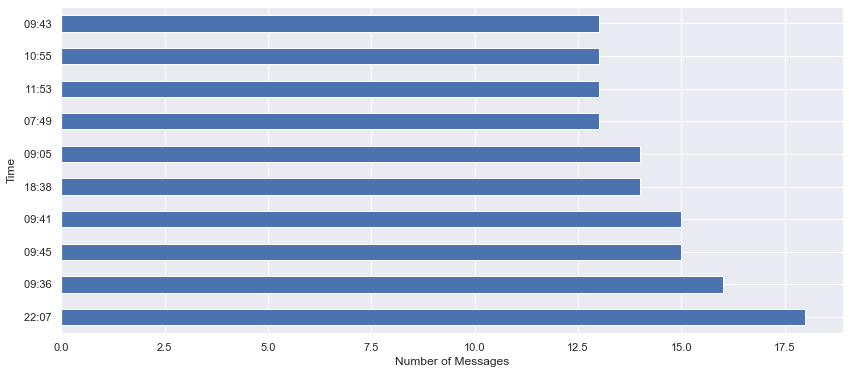

In [96]:
df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages sent
plt.xlabel('Number of Messages')
plt.ylabel('Time')

What are the most commonly used words?

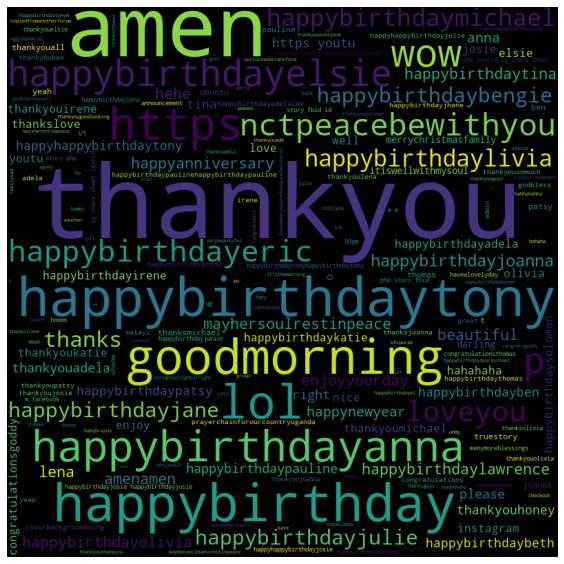

In [98]:
common_words=''
for val in df['Message'].values:
    val=str(val)
    tokens=val.split()
    
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    
    for words in tokens:
        common_words=common_words + words + ''
famcloud=WordCloud(width=800,height=800).generate(common_words)

plt.figure(figsize=(8,8))
plt.imshow(famcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

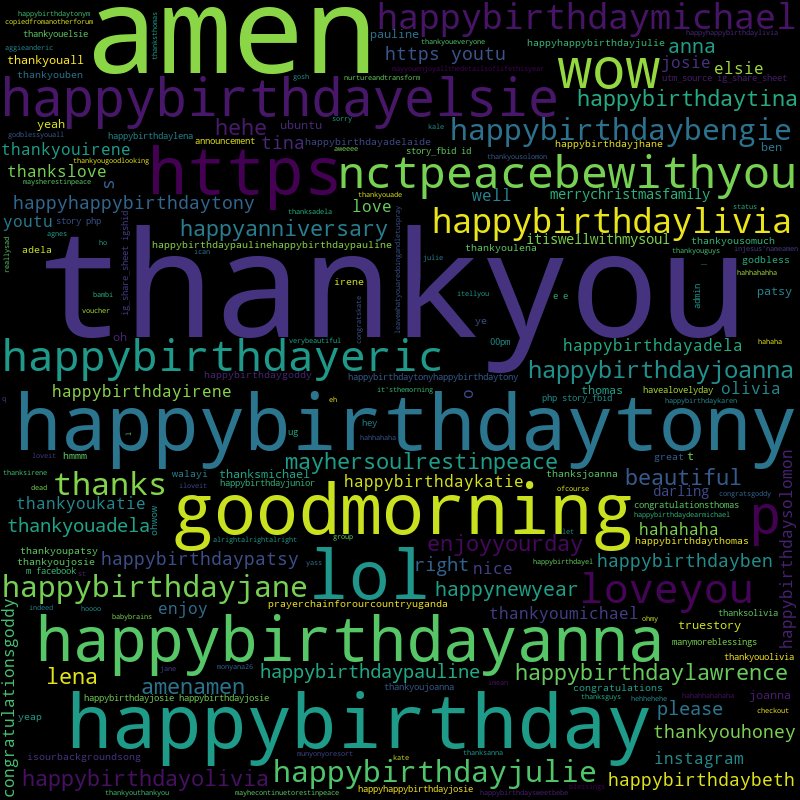

In [99]:
#If you want to download the image, Run the cell
famcloud.to_image()

In [100]:
df['Author'].unique()

array(['Joanna', 'Micheal', '+256 792 754083', 'Beth', 'Aunt Dora',
       'Kate', 'Anna Christine', 'TJ Musiitwa', 'Ben', 'Anthony Busulwa',
       '+1 (647) 704-2525', 'Patsy', 'Irene Nakalembe', 'Lena',
       'Olivia Namulindwa', 'Lawrence Kibuuka', 'Fina', 'Junior',
       'Julie Anna', 'Elsie Mulo', 'Tony Mulo', 'Pauline', 'Livia Livie',
       '+256 776 584356 left', 'Bengie', 'John Thomas', '+44 7525 475883',
       '+256 795 230837', '+256 776 584356', 'Jane',
       '+256 795 230837 left', 'Adela Mulo', 'Kirijja Godfrey',
       'Eric Mulo', '+256 779 228234'], dtype=object)

Find out the group's top 20 emoji usage

In [105]:
from collections import Counter
emojiGrpCtr=Counter()
emojis_list=map(lambda x: "".join(x.split()),emoji.UNICODE_EMOJI.keys())
r=re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx,row in df.iterrows():
    emojis_found=r.findall(row['Message'])
    for emoji_found in emojis_found:
        emojiGrpCtr[emoji_found]+=1
for item in emojiGrpCtr.most_common(20):
    print(item[0] + ' - '+str(item[1]))

en - 1399
es - 1204
it - 880
de - 577
fr - 190
pt - 48


In [106]:
emojiGrp=pd.DataFrame.from_dict(emojiGrpCtr,orient='index').reset_index()

In [107]:
emojiGrp=emojiGrp.rename(columns={'index':'Emoji',0:'Count'})

In [108]:
emojiGrp.head()

,Emoji,Count
0,es,1204
1,en,1399
2,de,577
3,it,880
4,fr,190


## Sentiment Analysis

In [109]:
df['Polarity']=df['Message'].map(lambda text: TextBlob(text).sentiment.polarity)

Randomly select 5 reviews with the highest positive polarity score

In [111]:
print('5 random reviews with the highest positive sentiment polarity: \n ')
cl=df.loc[df['Polarity']==1,['Message']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 
 
I am loving these pictures!!! Beautiful couple!!! 💕
happy birthday Bengie!
Amen hehe.. great! So coming to place of work or meeting at the Attic
Happy birthday Ben!!
lol, this baby giving marks!


Randomly select 5 reviews with the most neutral sentiment polarity score

In [112]:
print('5 reviews with the most neutral sentiment(zero) polarity: \n')
cl=df.loc[df['Polarity']==0,['Message']].sample(5).values
for c in cl:
    print(c[0])

5 reviews with the most neutral sentiment(zero) polarity: 

BETTY BAKIREKE NAMBOOZE
Njagala nga bwendi
Who says we hve to wait for Friday...
Why not😄
Dedication to the birthday girl for all the dance strokes you've seen us all on this chat perform


In [113]:
print('5 reviews with the most negative polarity: \n')
cl=df.loc[df['Polarity']==-0.50,['Message']].sample(5).values
for c in cl:
    print(c[0])

5 reviews with the most negative polarity: 

Wrong... he's bald already
Sorry about that
Sorry I'm just opening my eyes
Guilty as charged
*Not Easy to be a Teacher  !!!!!*


The distribution of review sentiment polarity score

(array([2.000e+00, 1.100e+01, 5.900e+01, 7.800e+01, 9.100e+01, 3.318e+03,
        2.960e+02, 3.470e+02, 1.680e+02, 8.150e+02]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

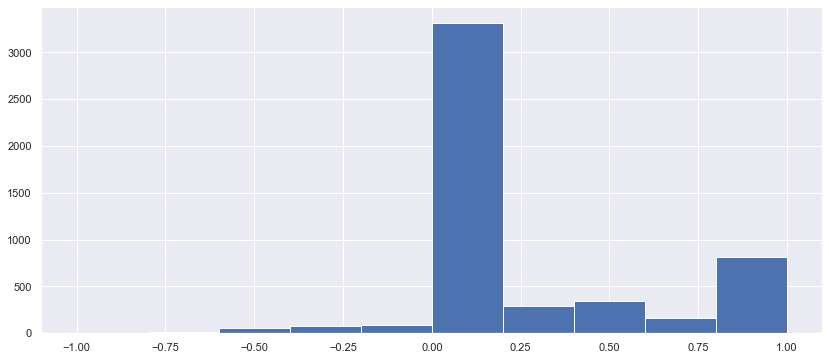

In [114]:
plt.hist('Polarity',data=df)

## The End